### Accessing google colab

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hasanmoni","key":"5a2a53290ee4866258b0dfd1198cabb0"}'}

In [4]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


### Loading necessary library

In [12]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import warnings
warnings.simplefilter("ignore")

### Loading and unzipping of dataset

In [13]:
!kaggle datasets download -d clorichel/boat-types-recognition

boat-types-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
!unzip boat-types-recognition

Archive:  boat-types-recognition.zip
replace boats/buoy/alaska-ocean-warning-light-sea-2574393.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Selecting path of the dataset

In [34]:
data_path = Path('/content/boats')


In [35]:
(data_path).ls()

[PosixPath('/content/boats/kayak'),
 PosixPath('/content/boats/gondola'),
 PosixPath('/content/boats/freight boat'),
 PosixPath('/content/boats/paper boat'),
 PosixPath('/content/boats/cruise ship'),
 PosixPath('/content/boats/sailboat'),
 PosixPath('/content/boats/ferry boat'),
 PosixPath('/content/boats/buoy'),
 PosixPath('/content/boats/inflatable boat')]

### Loading dataset using fastai

In [17]:
data = ImageDataBunch.from_folder(data_path, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(flip_vert=False),
                                  size=128,
                                  bs=64, 
                                  num_workers=0).normalize(imagenet_stats)


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

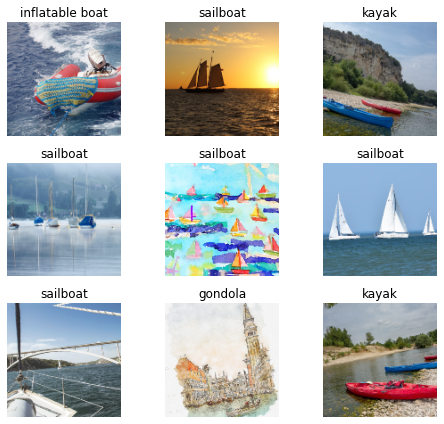

In [11]:
data.show_batch(rows=3, figsize=(7,6))


### printing class name and the number of class

In [21]:
print(data.classes)
len(data.classes)


['buoy', 'cruise ship', 'ferry boat', 'freight boat', 'gondola', 'inflatable boat', 'kayak', 'paper boat', 'sailboat']


9

### selecting model

In [22]:
model = create_cnn(data, models.resnet34, metrics=accuracy, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


### training for 4 epoch

In [23]:
model.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.540347,1.120170,0.705479,00:53
1,1.744060,0.842773,0.743151,00:53
2,1.349577,0.757884,0.784247,00:52
3,1.101262,0.749543,0.763699,00:52


In [25]:
# Saving model
model.save('stage-1')

In [26]:
# Training for 5 epoch and with different learning rate
lr = 1e-3
model.unfreeze()
model.fit_one_cycle(5, slice(lr))


epoch,train_loss,valid_loss,accuracy,time
0,0.718729,0.704006,0.811644,00:53
1,0.625152,0.700644,0.801370,00:53
2,0.500142,0.693488,0.835616,00:53
3,0.409898,0.654085,0.821918,00:53
4,0.329549,0.630335,0.821918,00:53


In [ ]:
# Saving model
model.save('stage-2')


### Loading dataset with different size

In [29]:
data = ImageDataBunch.from_folder(data_path, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(flip_vert=False),
                                  size=256,
                                  bs=64, 
                                  num_workers=0).normalize(imagenet_stats)


In [30]:
model.data = data

In [31]:
# Checking shape 
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [32]:
# Training with new image size
model.freeze()
model.fit_one_cycle(5, slice(1e-3))


epoch,train_loss,valid_loss,accuracy,time
0,0.399901,0.175826,0.948630,01:24
1,0.318237,0.167207,0.952055,01:23
2,0.286564,0.163113,0.955479,01:23
3,0.266934,0.160856,0.952055,01:23
4,0.244399,0.156117,0.952055,01:23


In [33]:
# Saving model
model.save('stage-3')